# Workshop 3:  pandas, netCDF, xarray

# Part I:  pandas

Pandas is a an open source library providing high-performance, easy-to-use data structures and data analysis tools. Pandas is particularly suited to the analysis of tabular data, i.e. data that can can go into a table. In other words, if you can imagine the data in an Excel spreadsheet, then Pandas is the tool for the job. In the climate context it is useful for time series analysis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

In [2]:
names = ['Alice', 'Bob', 'Claire']
values = [30, 15, 22]
ages = pd.Series(values, index=names)
ages

Alice     30
Bob       15
Claire    22
dtype: int64

Series have built in plotting methods.

<AxesSubplot:>

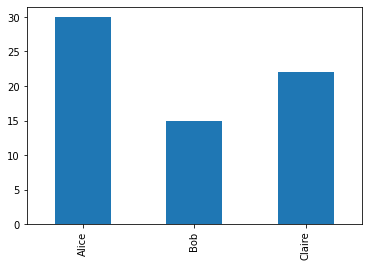

In [3]:
ages.plot(kind='bar')

Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [4]:
np.log(ages) / ages**2

Alice     0.003779
Bob       0.012036
Claire    0.006386
dtype: float64

We can access the underlying index object if we need to:

In [5]:
ages.index

Index(['Alice', 'Bob', 'Claire'], dtype='object')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [6]:
ages.loc['Claire']

22

Or by raw position using `.iloc`

In [7]:
ages.iloc[2]

22

We can pass a list or array to loc to get multiple rows back:

In [8]:
ages.loc[['Bob', 'Alice']]

Bob      15
Alice    30
dtype: int64

And we can even use slice notation

In [9]:
ages.loc['Alice':'Claire']

Alice     30
Bob       15
Claire    22
dtype: int64

In [10]:
ages.iloc[1:]

Bob       15
Claire    22
dtype: int64

If we need to, we can always get the raw data back out as well

In [11]:
ages.values # a numpy array

array([30, 15, 22])

In [12]:
ages.index # a pandas Index object

Index(['Alice', 'Bob', 'Claire'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limit to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [13]:
# first we create a dictionary
data = {'age': [30, 15, 22],
        'height': [180, 155, 160],
        'weight': [70, 52, np.nan]}
df = pd.DataFrame(data, index=['Alice', 'Bob', 'Claire'])
df

,age,height,weight
Alice,30,180,70.0
Bob,15,155,52.0
Claire,22,160,NaN


Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Alice to Claire
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3 non-null      int64  
 1   height  3 non-null      int64  
 2   weight  2 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


A wide range of statistical functions are available on both Series and DataFrames.

In [15]:
df.min()

age        15.0
height    155.0
weight     52.0
dtype: float64

In [16]:
df.mean()

age        22.333333
height    165.000000
weight     61.000000
dtype: float64

In [17]:
df.std()

age        7.505553
height    13.228757
weight    12.727922
dtype: float64

In [18]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.000000
mean,22.333333,165.000000,61.000000
std,7.505553,13.228757,12.727922
min,15.000000,155.000000,52.000000
25%,18.500000,157.500000,56.500000
50%,22.000000,160.000000,61.000000
75%,26.000000,170.000000,65.500000
max,30.000000,180.000000,70.000000


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [19]:
df['height']

Alice     180
Bob       155
Claire    160
Name: height, dtype: int64

...or using attribute syntax.

In [20]:
df.height

Alice     180
Bob       155
Claire    160
Name: height, dtype: int64

Indexing works very similar to series

In [21]:
df.loc['Bob']

age        15.0
height    155.0
weight     52.0
Name: Bob, dtype: float64

In [22]:
df.iloc[2]

age        22.0
height    160.0
weight      NaN
Name: Claire, dtype: float64

But we can also specify the column we want to access

In [23]:
df.loc['Claire', 'age']

22

In [24]:
df.iloc[:2, 0]

Alice    30
Bob      15
Name: age, dtype: int64

We can make a calculation using columns from the DataFrame, it will keep the same index. We can easily add as another column to the DataFrame:

In [25]:
df['BMI'] = df.weight / (df.height/100)**2
df

,age,height,weight,BMI
Alice,30,180,70.0,21.604938
Bob,15,155,52.0,21.644121
Claire,22,160,NaN,NaN


We can also index using a boolean series. This is very useful

In [26]:
df['is_adult'] = df.age > 18
df

,age,height,weight,BMI,is_adult
Alice,30,180,70.0,21.604938,True
Bob,15,155,52.0,21.644121,False
Claire,22,160,NaN,NaN,True


## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<AxesSubplot:xlabel='age', ylabel='height'>

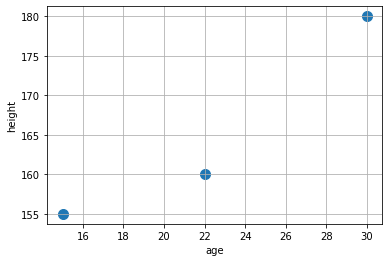

In [27]:
df.plot(kind='scatter', x='age', y='height', grid=True, s=100)

<AxesSubplot:>

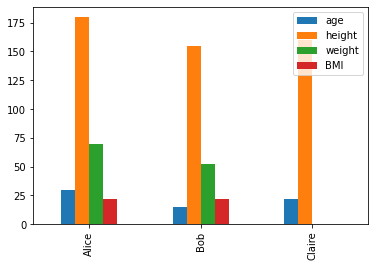

In [28]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<AxesSubplot:>

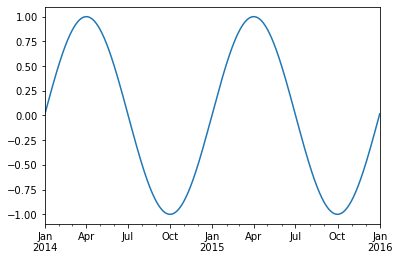

In [29]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<AxesSubplot:>

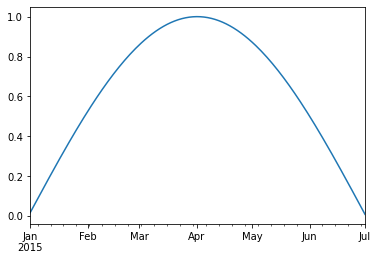

In [30]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The TimeIndex object has lots of useful attributes

In [31]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [32]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

## Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt).

In [33]:
# some shell code to download some data
# if this does not work, you can manually download the files by copying the addresses
# (Windows) in your Windows Explorer address bar
# (Mac) in the Finder 'Go/Connect to Server' Menu
! wget ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt
! wget ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/2017/CRND0103-2017-NY_Millbrook_3_W.txt
! head -2 data/HEADERS.txt | tail -1 > data/data.txt
! cat data/CRND0103-2017-NY_Millbrook_3_W.txt >> data/data.txt

zsh:1: command not found: wget
zsh:1: command not found: wget


We now have a text file on our hard drive called `data.txt`. Examine it.

To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [34]:
df = pd.read_csv('data/data.txt')
df.head()

,WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY
0,64756 20170101 2.422 -73.74 41.79 6.6 ...
1,64756 20170102 2.422 -73.74 41.79 4.0 ...
2,64756 20170103 2.422 -73.74 41.79 4.9 ...
3,64756 20170104 2.422 -73.74 41.79 8.7 ...
4,64756 20170105 2.422 -73.74 41.79 -0.5 ...


Pandas failed to identify the different columns. This is because it was expecting standard CSV (comma-separated values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace--the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [35]:
df = pd.read_csv('data/data.txt', sep='\s+')
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,-99.0,-99.0,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,-99.0,-99.0,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,-99.0,-99.0,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,-99.0,-99.0,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,-99.0,-99.0,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Great! It worked. 

If we look closely, we will see there are lots of -99 and -9999 values in the file. The [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt) tells us that these are values used to represent missing data. Let's tell this to pandas.

In [36]:
df = pd.read_csv('data/data.txt', sep='\s+', na_values=[-9999.0, -99.0])
df.head()

,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,64756,20170101,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
1,64756,20170102,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2,64756,20170103,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
3,64756,20170104,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
4,64756,20170105,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WBANNO                   365 non-null    int64  
 1   LST_DATE                 365 non-null    int64  
 2   CRX_VN                   365 non-null    float64
 3   LONGITUDE                365 non-null    float64
 4   LATITUDE                 365 non-null    float64
 5   T_DAILY_MAX              364 non-null    float64
 6   T_DAILY_MIN              364 non-null    float64
 7   T_DAILY_MEAN             364 non-null    float64
 8   T_DAILY_AVG              364 non-null    float64
 9   P_DAILY_CALC             364 non-null    float64
 10  SOLARAD_DAILY            364 non-null    float64
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object 
 12  SUR_TEMP_DAILY_MAX       364 non-null    float64
 13  SUR_TEMP_DAILY_MIN       364 non-null    float64
 14  SUR_TEMP_DAILY_AVG       3

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let's help it.

In [38]:
df = pd.read_csv('data/data.txt', sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   WBANNO                   365 non-null    int64         
 1   LST_DATE                 365 non-null    datetime64[ns]
 2   CRX_VN                   365 non-null    float64       
 3   LONGITUDE                365 non-null    float64       
 4   LATITUDE                 365 non-null    float64       
 5   T_DAILY_MAX              364 non-null    float64       
 6   T_DAILY_MIN              364 non-null    float64       
 7   T_DAILY_MEAN             364 non-null    float64       
 8   T_DAILY_AVG              364 non-null    float64       
 9   P_DAILY_CALC             364 non-null    float64       
 10  SOLARAD_DAILY            364 non-null    float64       
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object        
 12  SUR_TEMP_DAILY_MAX       364 non-nul

It worked! Finally, let's tell pandas to use the date column as the index.

In [39]:
df = df.set_index('LST_DATE')
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


We can now access values by time:

In [40]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

Or use slicing to get a range:

In [41]:
df.loc['2017-07-01':'2017-07-31']

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


### Quick Statistics

In [42]:
df.iloc[:,4:].describe()

,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,SUR_TEMP_DAILY_MAX,SUR_TEMP_DAILY_MIN,SUR_TEMP_DAILY_AVG,RH_DAILY_MAX,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,15.720055,4.037912,9.876374,9.990110,2.797802,13.068187,22.396703,1.624451,10.248626,88.974176,...,0.183804,0.181000,0.156533,0.138286,0.162844,12.344231,12.308516,12.060989,11.960989,11.971978
std,10.502087,9.460676,9.727451,9.619168,7.238628,7.953074,15.043183,11.044597,11.448891,9.012024,...,0.047493,0.052697,0.042775,0.019207,0.013814,9.367742,9.350273,8.760899,8.082595,7.170197
min,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,-12.100000,-29.800000,-22.800000,49.800000,...,0.075000,0.074000,0.069000,0.100000,0.128000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,9.800000,-6.325000,0.200000,87.000000,...,0.148000,0.137000,0.118000,0.118000,0.155000,2.275000,2.075000,2.575000,3.300000,4.100000
50%,17.450000,4.350000,10.850000,11.050000,0.000000,12.865000,25.150000,1.500000,12.400000,92.900000,...,0.192000,0.198000,0.169000,0.147000,0.166000,13.300000,13.350000,13.100000,12.850000,11.650000
75%,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,35.900000,10.600000,20.400000,94.700000,...,0.221000,0.219000,0.188000,0.152250,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,45.700000,21.000000,28.000000,97.800000,...,0.294000,0.321000,0.231000,0.170000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


### Plotting Values

We can now quickly make plots of the data

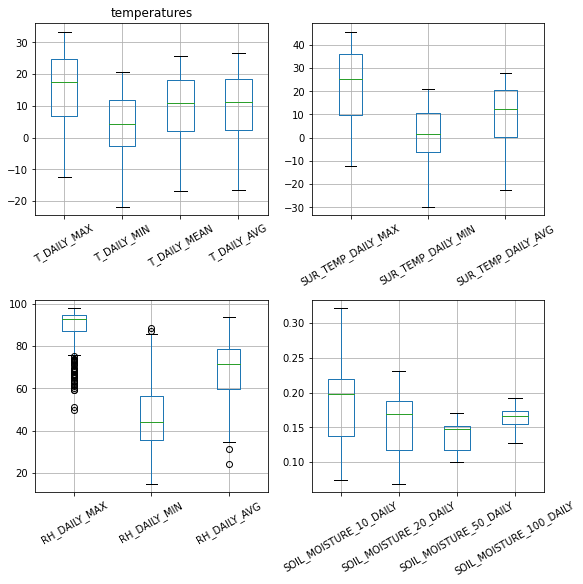

In [43]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8,8), constrained_layout=True)

ax[0,0].set_title('temperatures')
df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])

for i in range(2):
    for j in range(2):
        ax[i,j].set_xticklabels(ax[i,j].get_xticklabels(), rotation=30);

Pandas is very "time aware":

<AxesSubplot:xlabel='LST_DATE'>

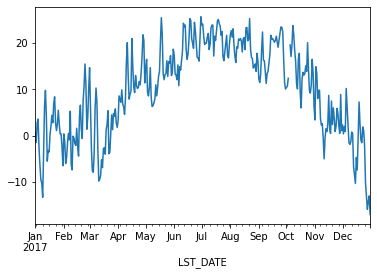

In [44]:
df.T_DAILY_MEAN.plot()

Note: we could also manually create an axis and plot into it.

Text(0.5, 1.0, 'Pandas Made This!')

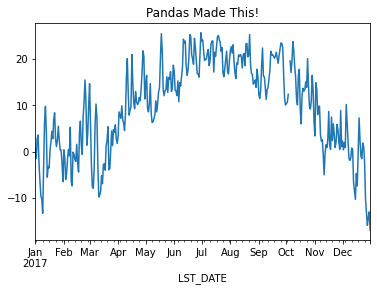

In [45]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

<AxesSubplot:xlabel='LST_DATE'>

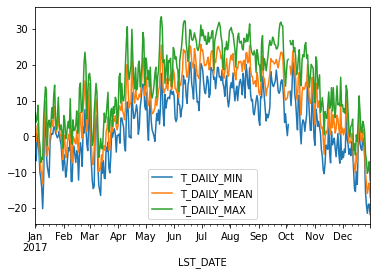

In [46]:
temps_list = ['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']
df[temps_list].plot()

### Rolling operations

We easily calculate the running mean by applying a [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) window and specifying a function (in this case the `mean` function) to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

<AxesSubplot:xlabel='LST_DATE'>

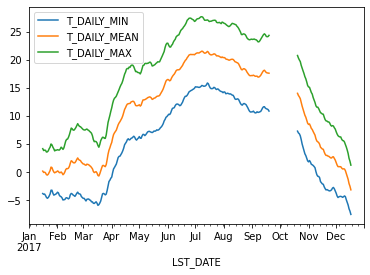

In [47]:
df[temps_list].rolling(30, center=True).mean().plot()

## <span style="color:blue">Exercises</span>

1. Convert the following dictionary into a Pandas Series and display on overview of basic statistics (count, mean, std, min,... see DataFrame subsection above). `d1 = {'a': 100, 'b': 200, 'c':300, 'd':400, 'e':800}`

2. Convert the following data into a DataFrame:
```
exam_data={'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
              'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
              'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
              'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
```
Calculate the mean score, select those whose attemps>2, and calculate how many rows are missing a score (you can use the built-in `.isnull()` function).

3. Create a a daily time series from 2015-2020 with an noisy annual cycle. Resample the data by taking the mean over each month using `resample('M')`. Create the climatology (monhtly means) using the groupby(timeseries.index.month) operator.
<img src="figures/3a3.png" width="600">

## <span style="color:green">Solutions</span>

In [48]:
# 1. Convert the following dictionary into a Pandas Series
# and display on overview of basic statistics
# (count, mean, std, min,... see DataFrame subsection above).
d1 = {'a': 100, 'b': 200, 'c':300, 'd':400, 'e':800}
new_series = pd.Series(d1)
print(new_series)
new_series.describe()

a    100
b    200
c    300
d    400
e    800
dtype: int64


count      5.000000
mean     360.000000
std      270.185122
min      100.000000
25%      200.000000
50%      300.000000
75%      400.000000
max      800.000000
dtype: float64

In [49]:
# 2. Convert the following data into a DataFrame:
# Calculate the mean score, select those whose attemps>2, 
# and calculate how many rows are missing a score (you can use the built-in `.isnull()` function).

exam_data={'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
           'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
           'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
           'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
exams = pd.DataFrame(exam_data)
print(f'The mean score:   {exams["score"].mean()}')

print("Number of attempts in the examination is greater than 2:")
print(exams[exams['attempts'] > 2])

print(f'This many rows are missing a score:   {len(exams[exams["score"].isnull()])}')

The mean score:   13.5625
Number of attempts in the examination is greater than 2:
      name  score  attempts qualify
1     Dima    9.0         3      no
3    James    NaN         3      no
5  Michael   20.0         3     yes
This many rows are missing a score:   2


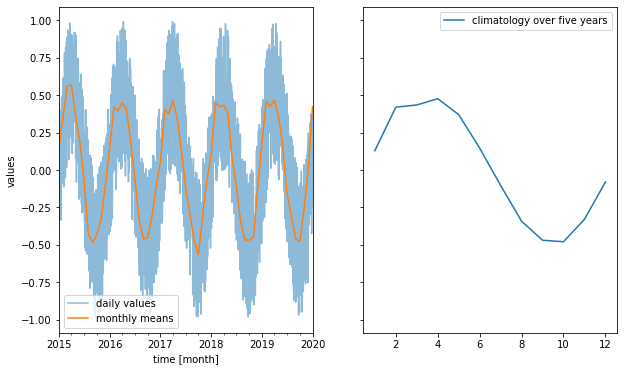

In [50]:
# 3. Create a a daily time series from 2015-2020 with an noisy annual cycle.
# Resample the data by taking the mean over each month using `resample('M')`.
# Create the climatology (monhtly means) using the groupby(timeseries.index.month) operator.

dates = pd.date_range(start='2015-01-01', end='2020-01-01', freq='D')
timeseries = pd.Series(.5*np.sin(2*np.pi*dates.dayofyear/365)+np.random.rand((len(dates)))-.5,
                       index=dates)
fig, ax = plt.subplots(1, 2, figsize=(10,6), sharey=True)

timeseries.plot(ax=ax[0], label='daily values', alpha=.5)
timeseries.resample('M').mean().plot(ax=ax[0], label='monthly means')
ax[0].legend()
ax[0].set_xlabel('time [years C.E.]')
ax[0].set_ylabel('values')

timeseries.groupby(timeseries.index.month).mean().plot(ax=ax[1], label='climatology over five years')
ax[1].legend()
ax[0].set_xlabel('time [month]')
plt.savefig('figures/3a3')